In [338]:
import torch
import numpy as np

In [339]:
def get_mean():
    x = torch.empty(1, 10).normal_(5, 10).numpy().reshape(10, )
    return x

In [340]:
get_mean()

array([ 17.678488 ,   6.6607943,   8.580836 , -15.874854 ,   7.077008 ,
        -6.1272836,  -2.6700227,   6.427684 ,   6.8842673,  10.548766 ],
      dtype=float32)

In [341]:
# Get reward with mean, there are total 10 action -> 10 means
def get_reward(mean):
    # return torch.empty(1, 1).normal_(mean, std = 1).reshape(-1).numpy().item()
    # return np.random.normal(loc = mean, scale = 1)
    return mean
get_reward(0.5)

0.5

In [342]:
def argmax(q_values):
    """
    Takes in a list of q_values and returns the index
    of the item with the highest value. Breaks ties randomly.
    returns: int - the index of the highest value in q_values
    """
    top = float("-inf")
    ties = []
    
    for i in range(len(q_values)):
        # if a value in q_values is greater than the highest value, then update top and reset ties to zero
        # if a value is equal to top value, then add the index to ties (hint: do this no matter what)
        # return a random selection from ties. (hint: look at np.random.choice)
        ### START CODE HERE ###
        if q_values[i] > top:
            top = q_values[i]
            ties = [i]
        elif q_values[i] == top:
            ties.append(i)
        ### END CODE HERE ###
    return ties[np.random.choice(len(ties))]

In [343]:
import random
def get_action(Q_t, epsilon):
    x = np.random.uniform(0, 1)
    if x > epsilon:
        return argmax(Q_t)
    else:
        return random.choice(list(range(0, 10)))
    
Q_t = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
epsilon = 0.5
get_action(Q_t, epsilon)

9

In [ ]:
# step_size = 0.1
num_steps = 2500
means = get_mean()
def get_reward_list(epsilon):
    Q_t = np.zeros(shape = (10, ))
    total_reward = []
    arm_count = np.zeros(shape = (10, ))
    for i in range(num_steps):
        # means = get_mean()
        action = get_action(Q_t, epsilon)
        reward = get_reward(means[action])
        arm_count[action] += 1
        step_size = 1.0/(arm_count[action])
        # step_size = 0.1
        Q_t[action] = step_size * reward + (1 - step_size)*Q_t[action]
        sum = np.sum([Q_t[j] * arm_count[j] for j in range(0, 10)])
        total_reward.append(sum/(i + 1))
    return total_reward
def get_mean_reward(epsilon, num_list):
    result = []
    for i in range(num_list):
        result.append(get_reward_list(epsilon))
    result = np.mean(result, axis = 0)
    return result


In [345]:
# means[means.argmax()], means[means.argmin()], means.argmax()

In [346]:
means

array([21.374561  , -7.2259474 ,  0.96479076,  4.4590726 , -1.5774335 ,
       -1.2199454 ,  1.0068934 ,  6.6075583 , 16.829075  ,  4.5821195 ],
      dtype=float32)

In [347]:
x = get_reward_list(0.1)
x[-1]

19.485148267626727

In [348]:
x = get_reward_list(0.99)
x[-1]

4.981938218760492

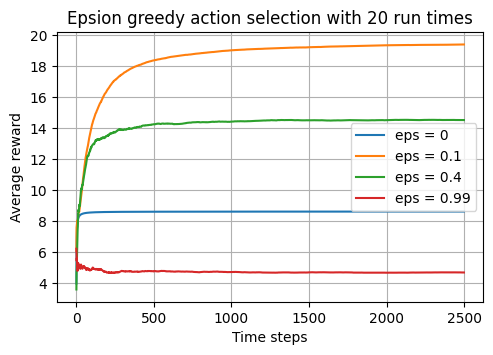

In [349]:
from matplotlib import pyplot as plt

plt.figure(figsize = (5.5, 3.5))
num_list = 20
plt.title(f"Epsion greedy action selection with {num_list} run times")
plt.plot(get_mean_reward(0, num_list))
plt.plot(get_mean_reward(0.1, num_list))
plt.plot(get_mean_reward(0.4, num_list))
plt.plot(get_mean_reward(0.99, num_list))
plt.legend(["eps = 0", "eps = 0.1","eps = 0.4", "eps = 0.99"])
plt.grid(True)
plt.xlabel("Time steps")
plt.ylabel("Average reward")
plt.show()